https://machinelearningmastery.com/multi-class-imbalanced-classification/

https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

https://stackoverflow.com/questions/48369464/imbalanced-classification-order-of-oversampling-vs-scaling-features

https://datascience.stackexchange.com/questions/71515/should-i-scale-data-before-or-after-balancing-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('./glass.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
data = df.values
data
data.shape
type(data)

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

(214, 10)

numpy.ndarray

In [4]:
X, y = data[:, :-1], data[:, -1]
X.shape
y.shape

(214, 9)

(214,)

In [5]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [8]:
y_label_encoded = LabelEncoder().fit_transform(y)
y_label_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [9]:
np.unique(y)
np.unique(y, return_counts=True)
unique_values, counts = np.unique(y, return_counts=True)
np.column_stack((unique_values, counts))

array([1., 2., 3., 5., 6., 7.])

(array([1., 2., 3., 5., 6., 7.]), array([70, 76, 17, 13,  9, 29], dtype=int64))

array([[ 1., 70.],
       [ 2., 76.],
       [ 3., 17.],
       [ 5., 13.],
       [ 6.,  9.],
       [ 7., 29.]])

In [10]:
np.unique(y_label_encoded)
np.unique(y_label_encoded, return_counts=True)
unique_values, counts = np.unique(y_label_encoded, return_counts=True)
np.column_stack((unique_values, counts))

array([0, 1, 2, 3, 4, 5], dtype=int64)

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([70, 76, 17, 13,  9, 29], dtype=int64))

array([[ 0, 70],
       [ 1, 76],
       [ 2, 17],
       [ 3, 13],
       [ 4,  9],
       [ 5, 29]], dtype=int64)

In [11]:
for klass in np.column_stack((unique_values, counts)):
  # autopep8: off
  print(f'Class={klass[0]}, n={klass[1]} ({klass[1]/len(y_label_encoded):.2%})')

Class=0, n=70 (32.71%)
Class=1, n=76 (35.51%)
Class=2, n=17 (7.94%)
Class=3, n=13 (6.07%)
Class=4, n=9 (4.21%)
Class=5, n=29 (13.55%)


<BarContainer object of 6 artists>

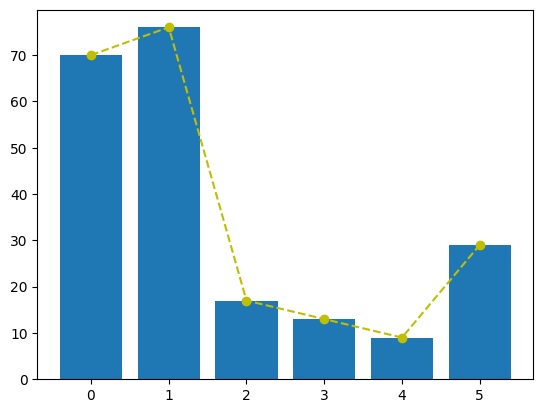

In [12]:
plt.bar(unique_values, counts)

plt.plot(unique_values, counts, 'yo--')

# You can use Line2D properties as keyword arguments for more control on the appearance.
# plt.plot(unique_values, counts, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

# oversampling

In [13]:
y = y_label_encoded

In [14]:
oversampler = SMOTE(sampling_strategy={
                    0: 100, 1: 100, 2: 200, 3: 200, 4: 200, 5: 200})
# oversampler = SMOTE()
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

In [15]:
np.unique(y_oversampled)
np.unique(y_oversampled, return_counts=True)
unique_values, counts = np.unique(y_oversampled, return_counts=True)
np.column_stack((unique_values, counts))

array([0, 1, 2, 3, 4, 5], dtype=int64)

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([100, 100, 200, 200, 200, 200], dtype=int64))

array([[  0, 100],
       [  1, 100],
       [  2, 200],
       [  3, 200],
       [  4, 200],
       [  5, 200]], dtype=int64)

In [20]:
for klass in np.column_stack((unique_values, counts)):
  # autopep8: off
  print(f'Class={klass[0]}, n={klass[1]} ({klass[1]/len(y_oversampled):.2%})')

Class=0, n=100 (10.00%)
Class=1, n=100 (10.00%)
Class=2, n=200 (20.00%)
Class=3, n=200 (20.00%)
Class=4, n=200 (20.00%)
Class=5, n=200 (20.00%)


<BarContainer object of 6 artists>

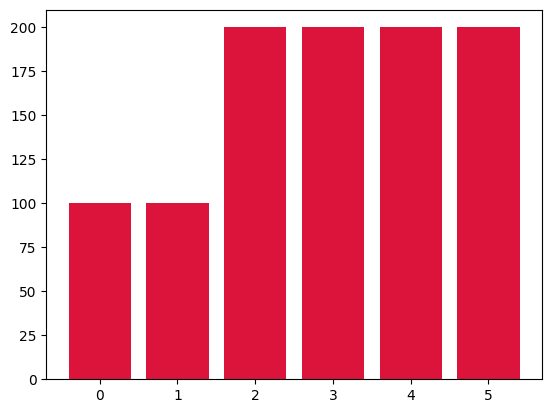

In [21]:
plt.bar(unique_values, counts, color='crimson')

# RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [23]:
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
  return cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)

In [27]:
model = RandomForestClassifier(n_estimators=1000)

scores = evaluate_model(model, X, y)
print(f'Mean Accuracy: {scores.mean():.2%} ({scores.std():.2%})')

scores = evaluate_model(model, X_oversampled, y_oversampled)
print(f'Mean Accuracy: {scores.mean():.2%} ({scores.std():.2%})')

Mean Accuracy: 80.68% (5.10%)
Mean Accuracy: 96.03% (1.07%)


In [28]:
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')

scores = evaluate_model(model, X, y)
print(f'Mean Accuracy: {scores.mean():.2%} ({scores.std():.2%})')

scores = evaluate_model(model, X_oversampled, y_oversampled)
print(f'Mean Accuracy: {scores.mean():.2%} ({scores.std():.2%})')

Mean Accuracy: 79.89% (4.82%)
Mean Accuracy: 95.87% (1.22%)


In [29]:
model = RandomForestClassifier(n_estimators=1000, class_weight={
                               0: 1.0, 1: 1.0, 2: 2.0, 3: 2.0, 4: 2.0, 5: 2.0})

scores = evaluate_model(model, X_oversampled, y_oversampled)
print(f'Mean Accuracy: {scores.mean():.2%} ({scores.std():.2%})')

Mean Accuracy: 96.03% (0.96%)
